# This notebook demonstrates how to:

1. Collect Reddit data using PMAW/PRAW
2. Do sentiment analysis using VADER
3. Do sentiment analysis using EMPATH

#### Credit: Darshan Satra (dsatra@iu.edu)



## 1. Script to collect data from Reddit using PMAW/PRAW

For installing praw:

In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.9 MB/s eta 0:00:00


### How to get Reddit Developer Credentials

1. Go to www.reddit.com/prefs/apps/ or https://old.reddit.com/prefs/apps

2. Create a new script application.

3. Use the following value for Redirect uri: http://localhost:8080

4. Refer to https://praw.readthedocs.io/en/stable/getting_started/authentication.html#application-only-client-credentials-flow to understand the pieces of information needed for authentication (e.g. client_id, client_secret, etc.).


### A script for getting submissions from a particular subreddit between two dates and creating a dataframe out of it.

In [3]:
import praw
import pandas as pd
from datetime import datetime, timedelta

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='iHJMBdnO5iGHhBkXxixt0Q',
                     client_secret='-0K1jhtSUfGrEECt0p7YcANMGM6rwQ',
                     user_agent='test',
                     username='smmtest',
                     password='SMMclass22!!')


In [ ]:
# Define the subreddit and time range for the search
import praw
import pandas as pd
from datetime import datetime, timedelta

subreddit = 'NBA'
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 2, 28)

# Search for submissions in the subreddit during the specified time range
submissions = reddit.subreddit(subreddit).hot(limit=None)

# Create a list to store the data
data = []

# Iterate through the submissions and extract the desired data
for submission in submissions:
    submission_date = datetime.fromtimestamp(submission.created_utc)
    if start_date <= submission_date <= end_date:
        title = submission.title
        author = submission.author.name if submission.author else '[deleted]'
        score = submission.score
        created_utc = submission.created_utc
        data.append([title, author, score, created_utc])

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Title', 'Author', 'Score', 'Created_UTC'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data.csv', index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

### A script for getting reddit posts containing a few keywords between two dates

In [ ]:
subreddit = 'learnpython'
keywords = ['IDE', 'Python']
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

data = []

for submission in reddit.subreddit(subreddit).search(f'{keywords}', limit=None):
    created_utc = submission.created_utc
    submission_date = datetime.utcfromtimestamp(created_utc)
    if start_date <= submission_date < end_date:
        title = submission.title
        author = submission.author.name if submission.author else '[deleted]'
        score = submission.score
        data.append([title, author, score, submission_date])

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Title', 'Author', 'Score', 'Date'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data.csv', index=False)

### A script for getting X number of Reddit comments under a specific post

In [4]:
from praw.models import MoreComments
post_id = '1e8slr4'
num_comments = 1000

post = reddit.submission(id=post_id)
post.comments.replace_more(limit=1000)

data = []

def getComments(comments):
    try:
        for comment in comments:
            if isinstance(comment,MoreComments):
                continue
            author = comment.author.name if comment.author else '[deleted]'
            text = comment.body
            date = comment.created_utc
            score = comment.score
            data.append([author, text, date, score])
    except:
        print("")

getComments(post.comments.list())

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Author', 'Text', 'Date', 'Score'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data_actual.csv', index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

## 2. Script for sentiment analysis using VADER

To install the package use this command:

In [ ]:
pip install vaderSentiment


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Script for VADER

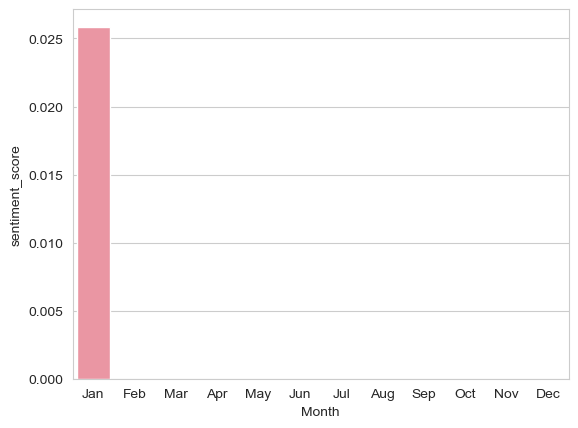

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import string
import seaborn as sns


df = pd.read_csv('reddit_data.csv')
df = df.loc[:,['Date','Text']]

sid_obj = SentimentIntensityAnalyzer()

# function to pre-precess
def preprocess_data(df):
    df["Text"] = df["Text"].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df['Date'].dt.strftime('%b')
    return df

# Compute sentiment and plot monthly score
def sentiment(df):
    sentiment_scores = []
    for text in df['Text']:
        scores = sid_obj.polarity_scores(text)
        sentiment_scores.append(scores['compound'])
    df['sentiment_score'] = sentiment_scores

    # Group by month and compute the mean sentiment score
    monthly_avg_sentiment = df.groupby('Month')['sentiment_score'].mean().reset_index()

    # Initialize a DataFrame with all months
    all_months = pd.DataFrame({'Month': pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS').strftime('%b')})

    # Merge sentiment data with all months
    monthly_avg_sentiment = all_months.merge(monthly_avg_sentiment, on='Month', how='left')

    # Replace NaN values with 0
    monthly_avg_sentiment['sentiment_score'] = monthly_avg_sentiment['sentiment_score'].fillna(0)

    sns.set_style('whitegrid')
    sns.barplot(x='Month', y='sentiment_score', data=monthly_avg_sentiment)

df =preprocess_data(df)
sentiment(df)

## 3. Script for sentiment analysis using EMPATH

To install empath use this command:

In [5]:
pip install empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57798 sha256=1c1424ac15d96039995d4cf905bc23796cb1f943e1c9cdfe18987b03b986fe0c
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [9]:
import empath
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/reddit_data_actual (1).csv')
df = df.loc[:, ['Score', 'Text']]

lexicon = empath.Empath()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

def preprocess_data(df):
    df["Text"] = df["Text"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

def sentiment(df):
    positive_emotion = []
    negative_emotion = []

    # Analyze each text for positive and negative emotions
    for text in df['Text']:
        scores = lexicon.analyze(text)
        positive_emotion.append(scores['positive_emotion'])
        negative_emotion.append(scores['negative_emotion'])

    df['positive_emotion'] = positive_emotion
    df['negative_emotion'] = negative_emotion

    # Sort the DataFrame by score in descending order
    df = df.sort_values(by='Score', ascending=False)

    # Plot sentiment scores by score
    sns.set_style('whitegrid')
    sns.lineplot(x='Score', y='positive_emotion', data=df, ax=ax1)
    ax1.set_title("Positive Emotion by Score")

    sns.lineplot(x='Score', y='negative_emotion', data=df, ax=ax2)
    ax2.set_title("Negative Emotion by Score")

df = preprocess_data(df)
sentiment(df)


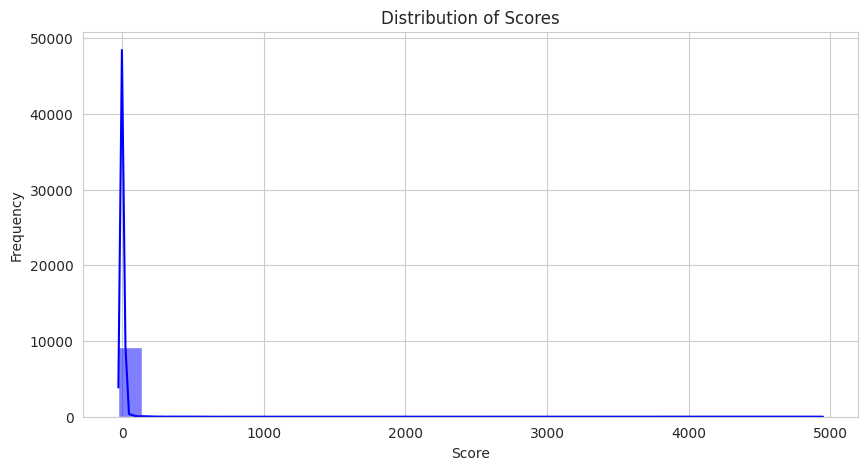

<ipython-input-7-8075ad2ad9c9>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for score_bin, group in df.groupby('Score_Bin'):


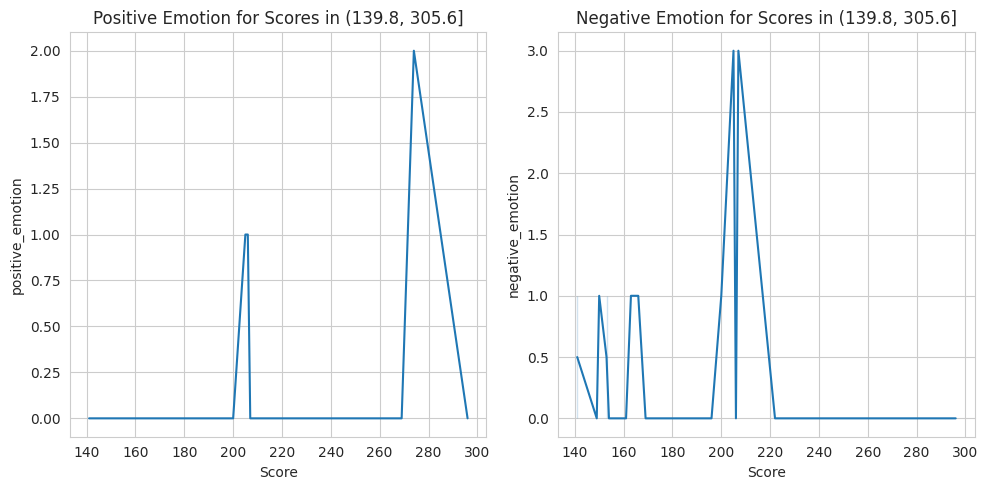

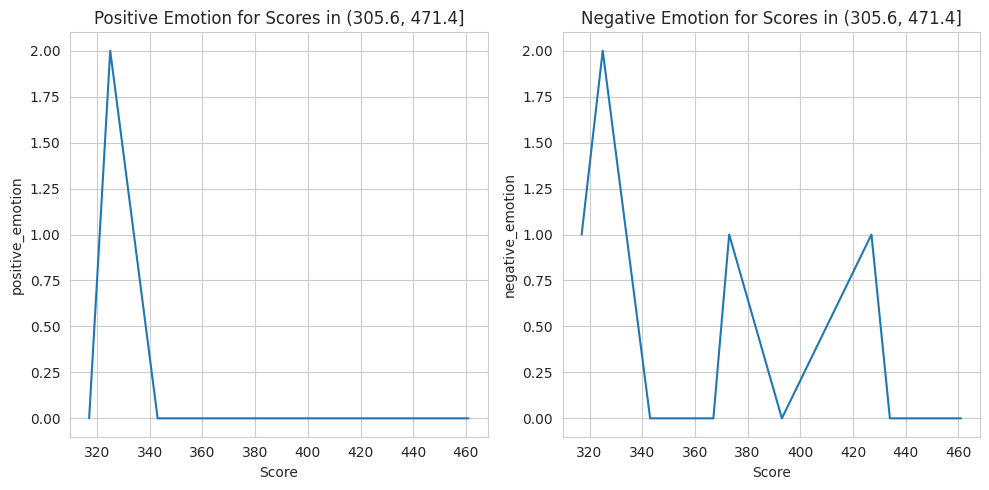

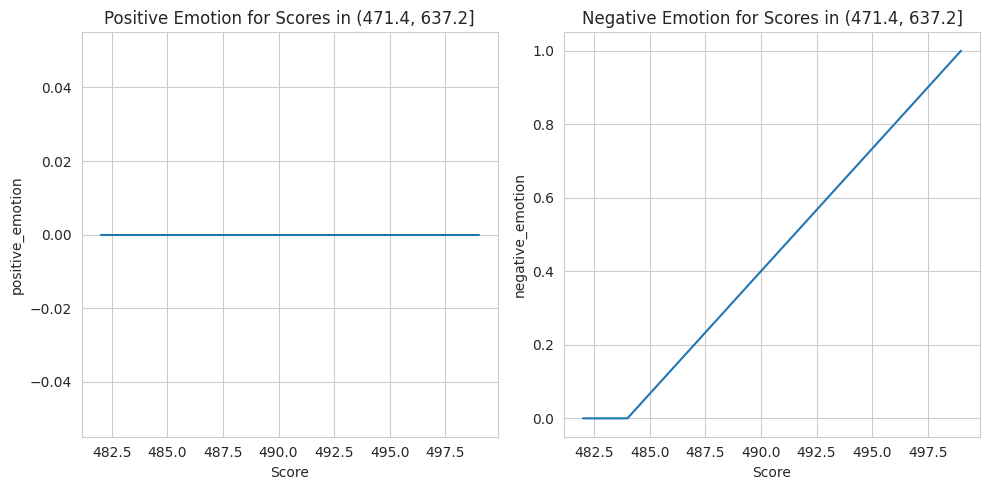

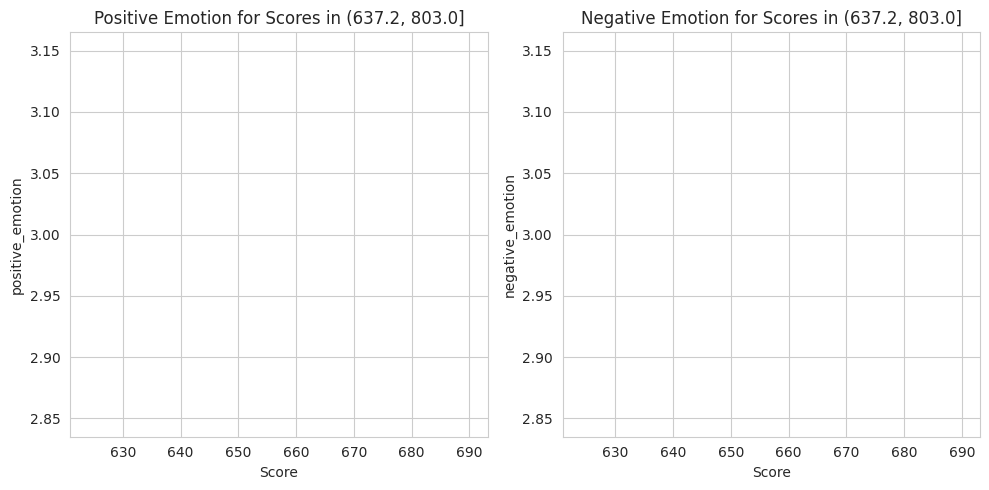

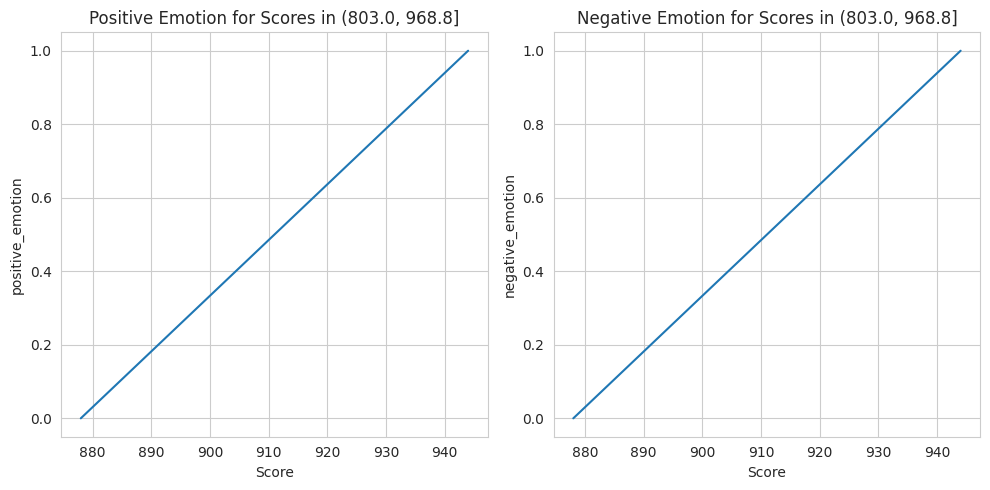

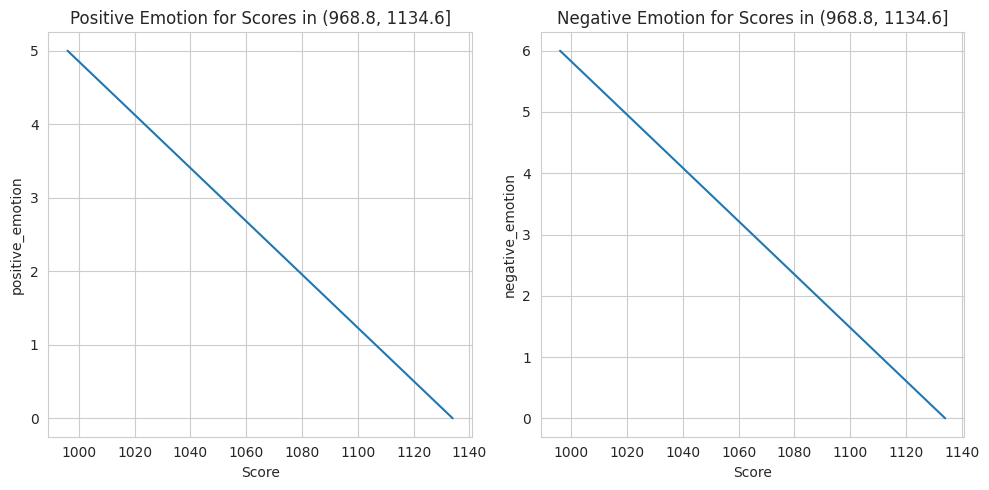

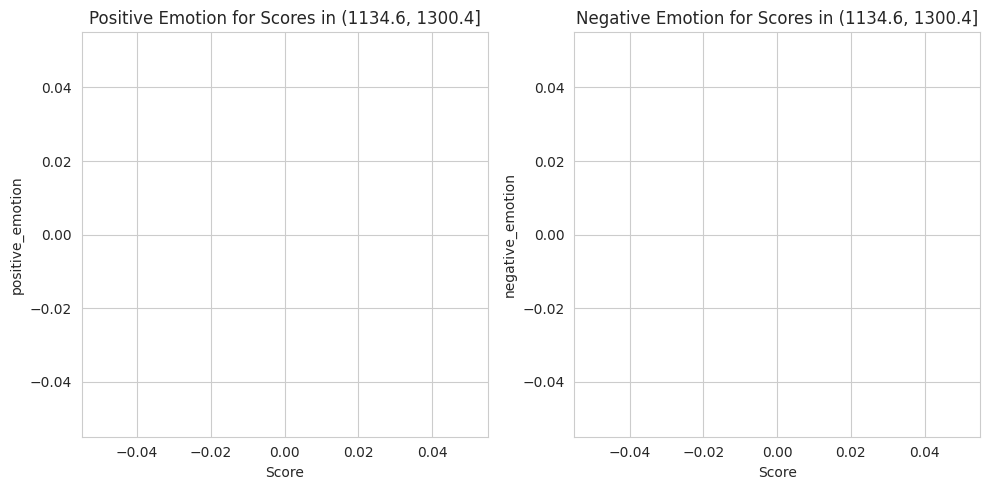

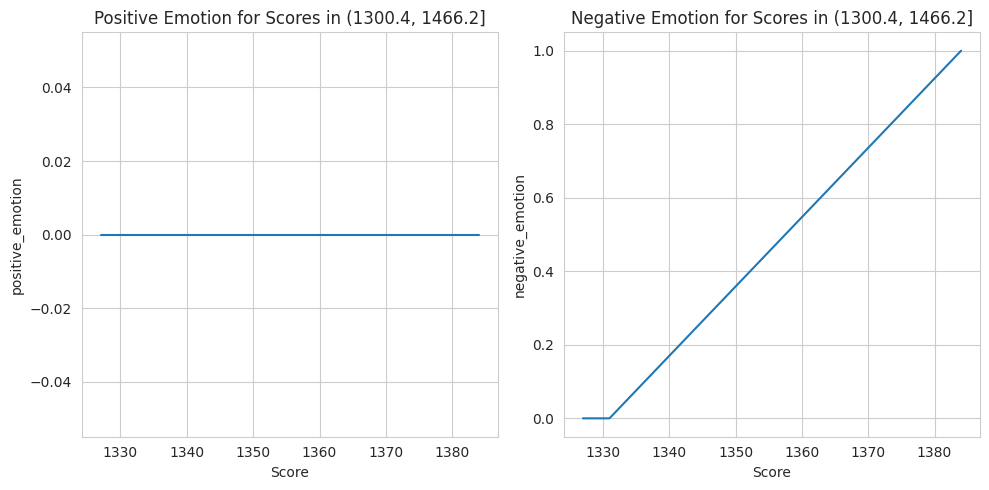

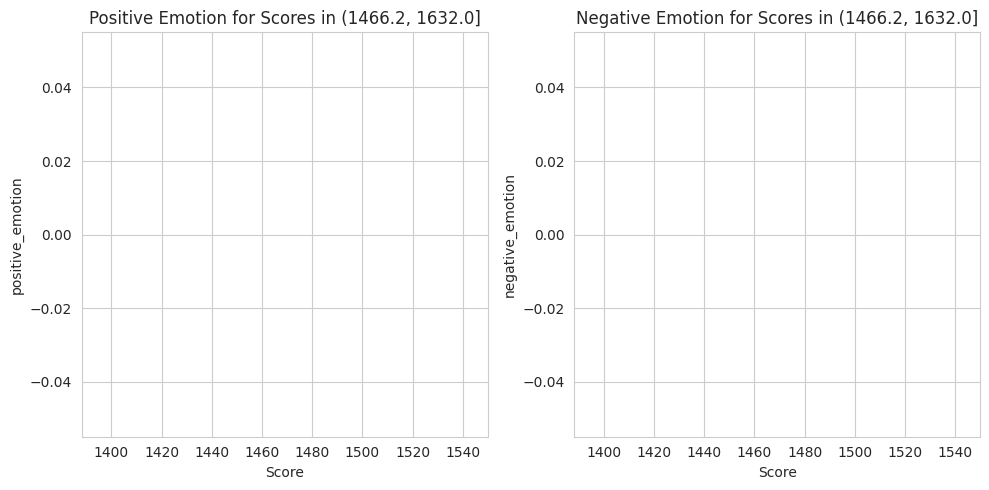

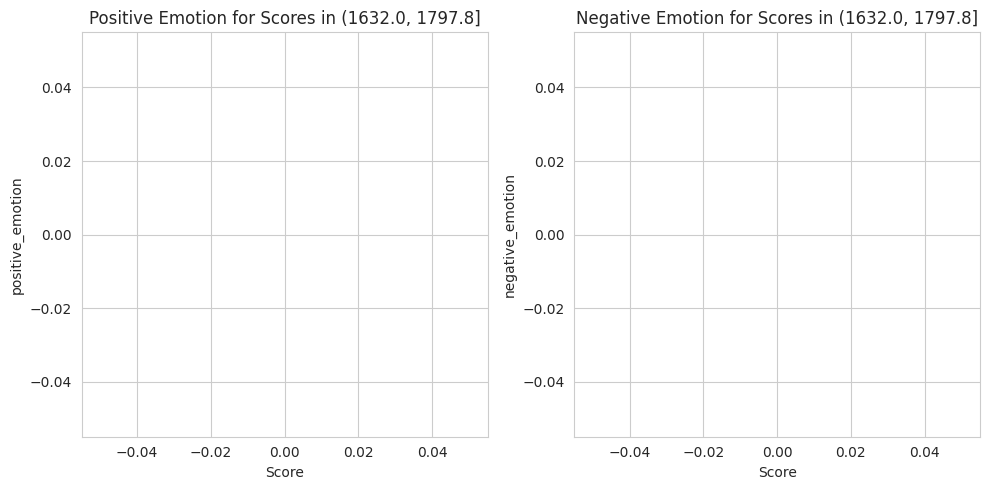

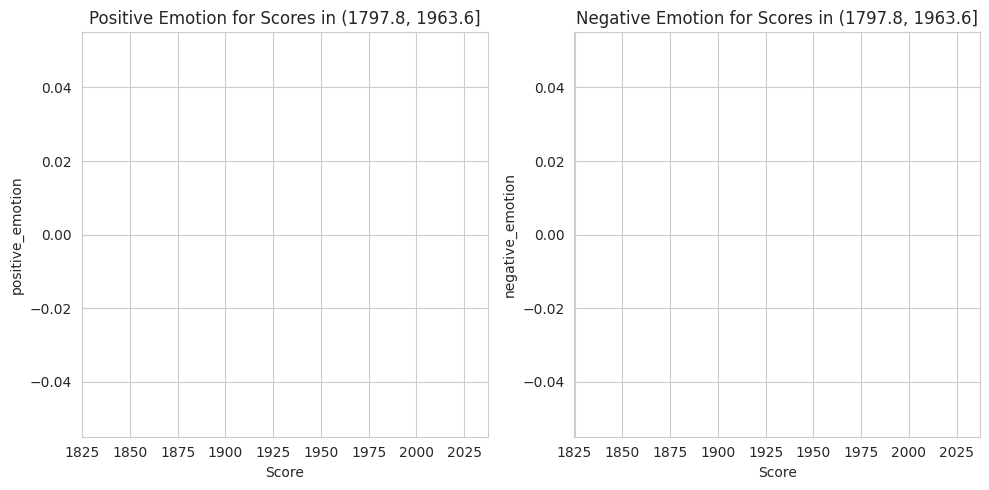

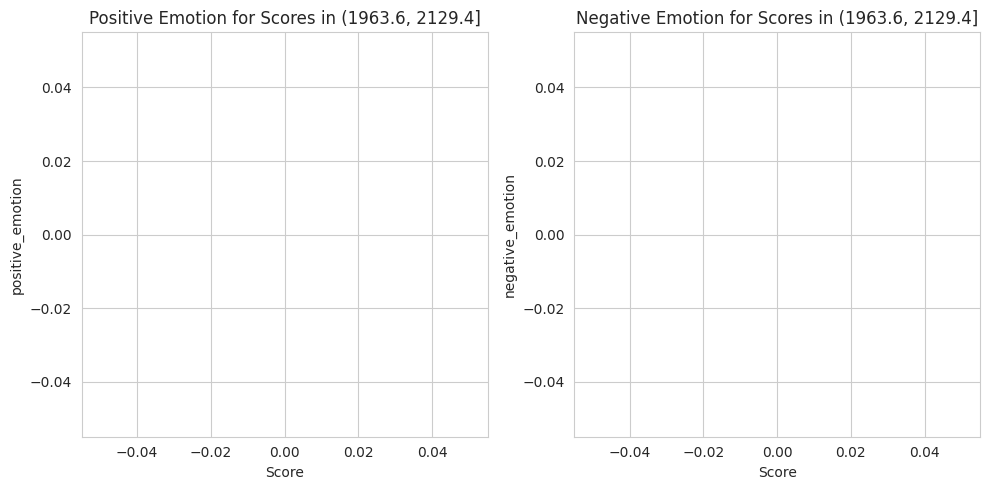

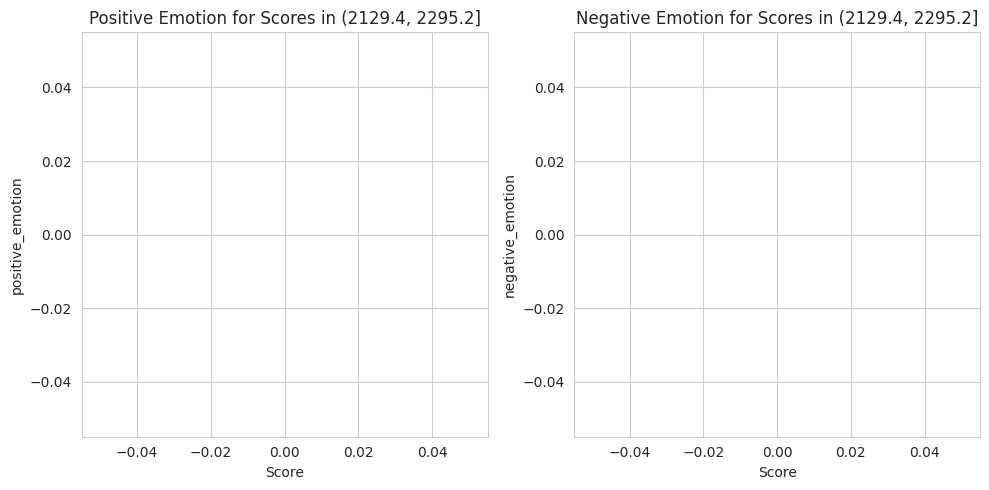

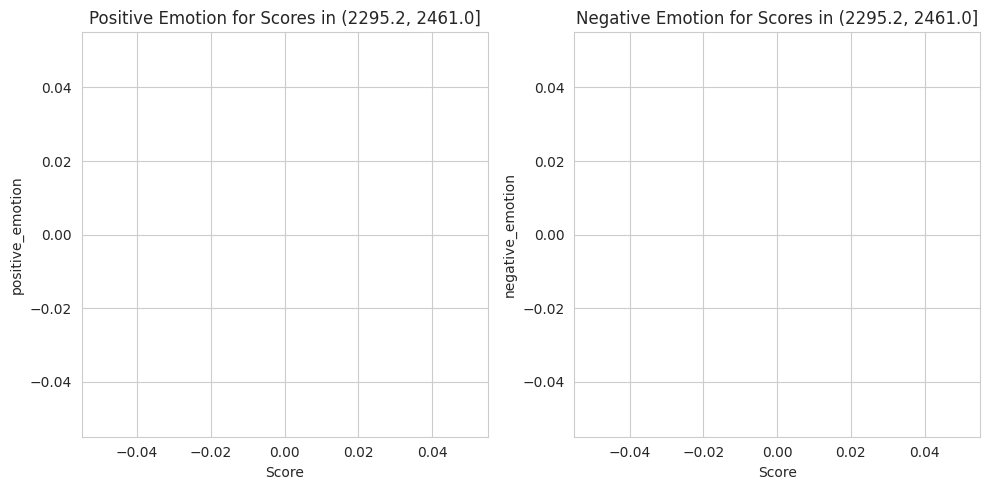

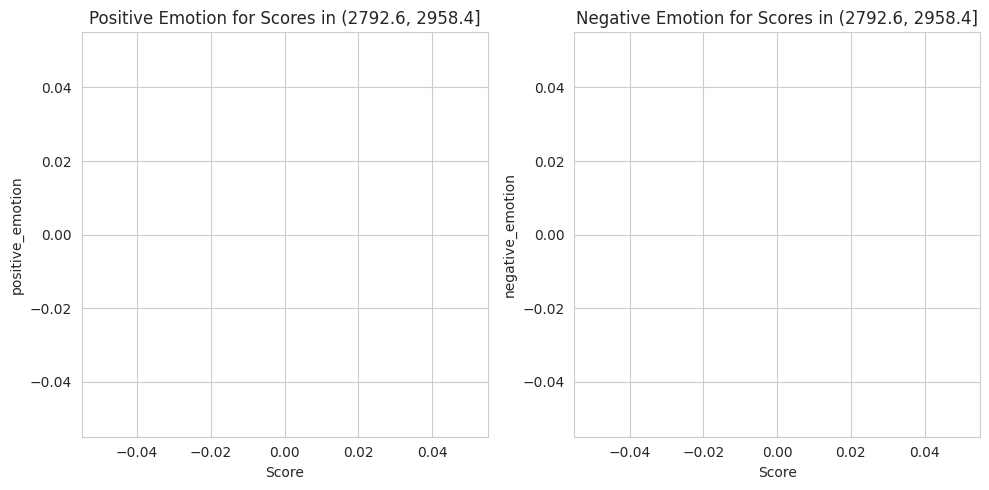

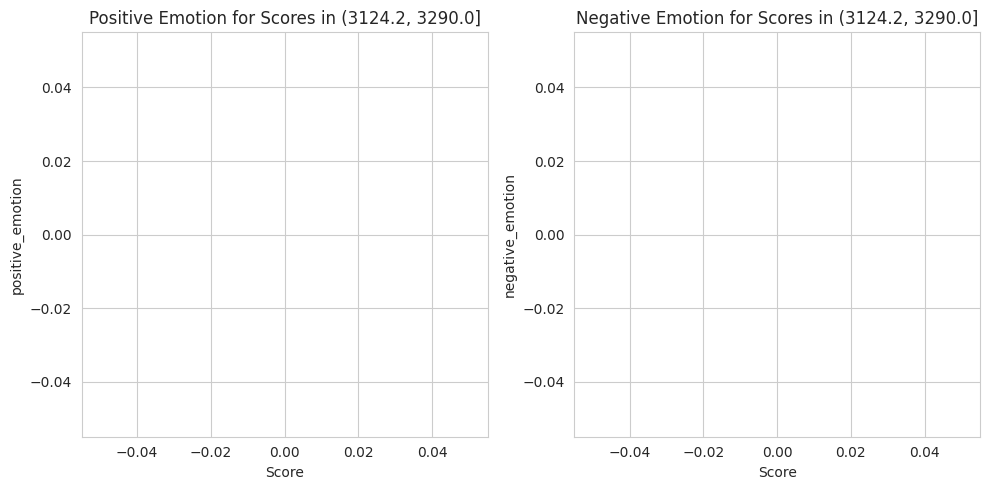

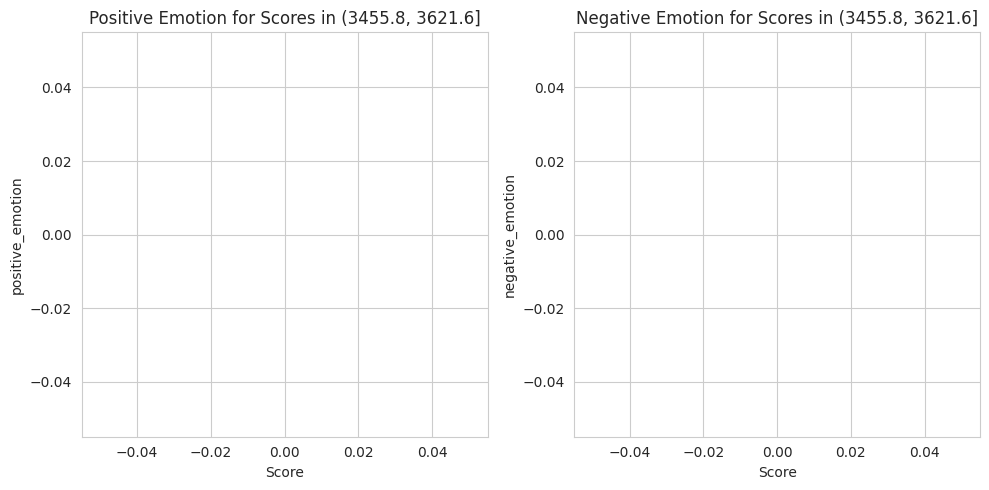

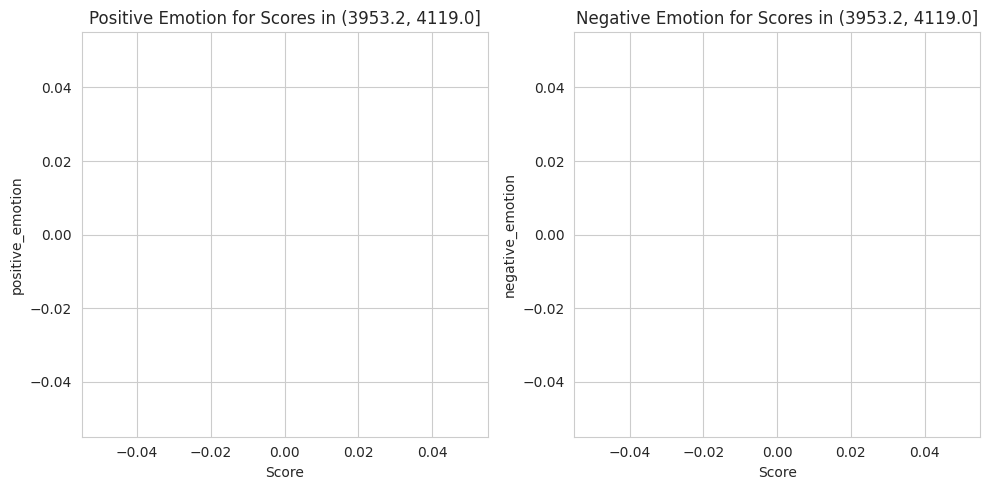

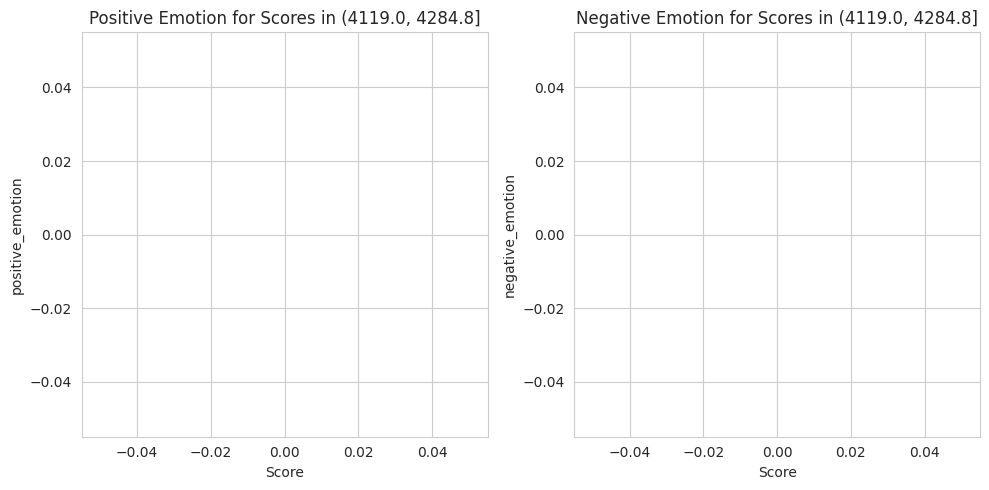

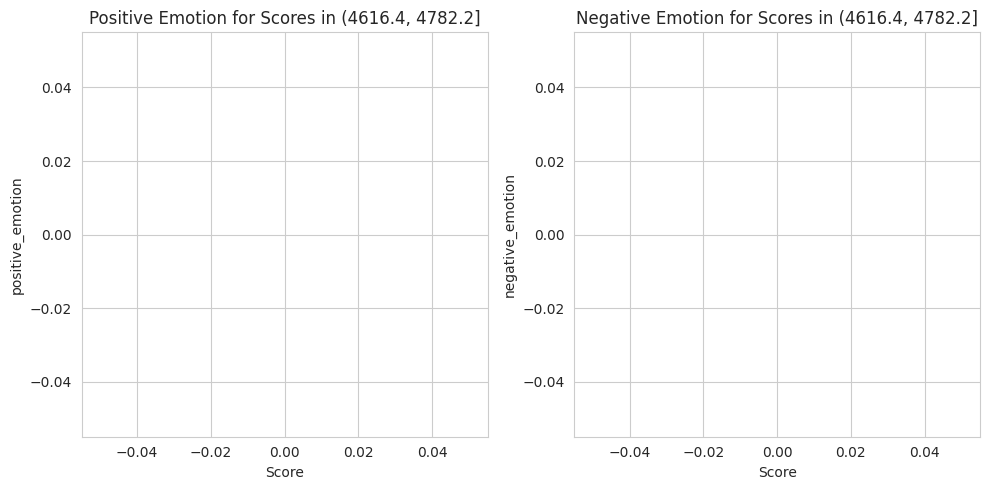

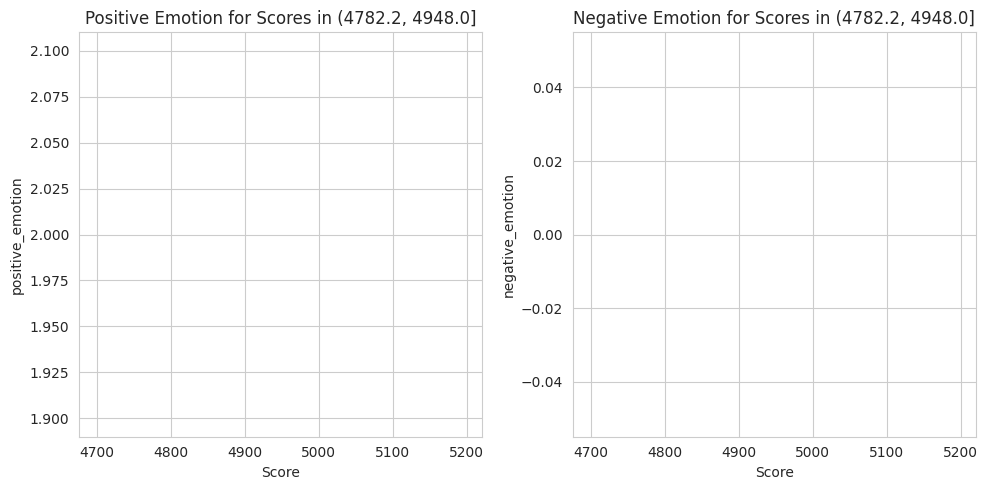

In [7]:
import empath
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/reddit_data_actual (1).csv')
df = df.loc[:, ['Score', 'Text']]

lexicon = empath.Empath()

def preprocess_data(df):
    df["Text"] = df["Text"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

def plot_distribution(df):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Score'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Scores")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show()

def sentiment(df):
    positive_emotion = []
    negative_emotion = []

    # Analyze each text for positive and negative emotions
    for text in df['Text']:
        scores = lexicon.analyze(text)
        positive_emotion.append(scores['positive_emotion'])
        negative_emotion.append(scores['negative_emotion'])

    df['positive_emotion'] = positive_emotion
    df['negative_emotion'] = negative_emotion

    # Create score bins for more focused plots
    df['Score_Bin'] = pd.cut(df['Score'], bins=30)

    for score_bin, group in df.groupby('Score_Bin'):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
        sns.set_style('whitegrid')

        sns.lineplot(x='Score', y='positive_emotion', data=group, ax=ax1)
        ax1.set_title(f"Positive Emotion for Scores in {score_bin}")

        sns.lineplot(x='Score', y='negative_emotion', data=group, ax=ax2)
        ax2.set_title(f"Negative Emotion for Scores in {score_bin}")

        plt.tight_layout()
        plt.show()

# Preprocess data
df = preprocess_data(df)

# Plot score distribution
plot_distribution(df)

# Analyze and plot sentiments
sentiment(df)
